#### Bhavya Sri Pragada
#### BL.EN.U4AIE21025

### A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav


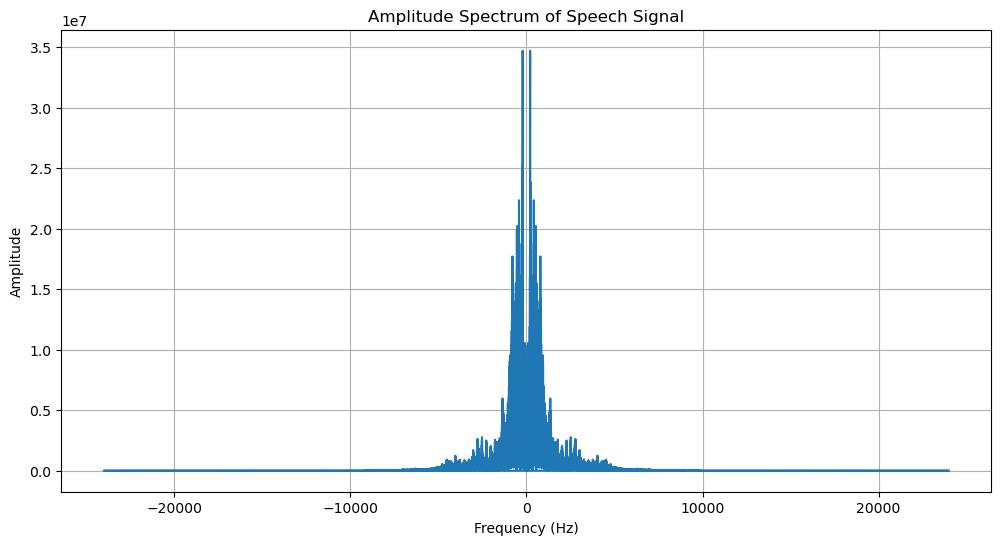

In [3]:
# Load a sample speech signal (replace 'your_speech_file.wav' with the actual file)
sample_rate, signal = wav.read('Bhavya_voice1.wav')

# Perform FFT (Fast Fourier Transform) on the speech signal
spectrum = np.fft.fft(signal)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(spectrum), d=1/sample_rate)

# Take the absolute value of the spectrum to get the amplitude
amplitude = np.abs(spectrum)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

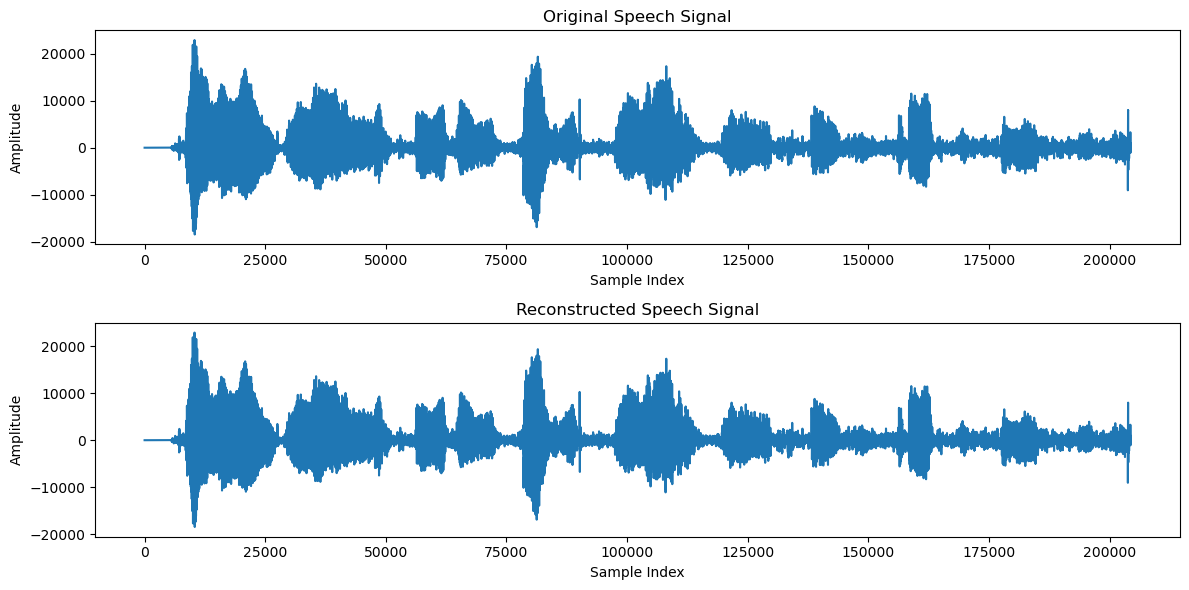

In [4]:
# Perform FFT (Fast Fourier Transform) on the speech signal
spectrum = np.fft.fft(signal)

# Perform IFFT (Inverse Fast Fourier Transform) to get back to the time domain
reconstructed_signal = np.fft.ifft(spectrum)

# Plot the original and reconstructed signals for comparison
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Speech Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(np.real(reconstructed_signal))  # Use np.real() to get the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

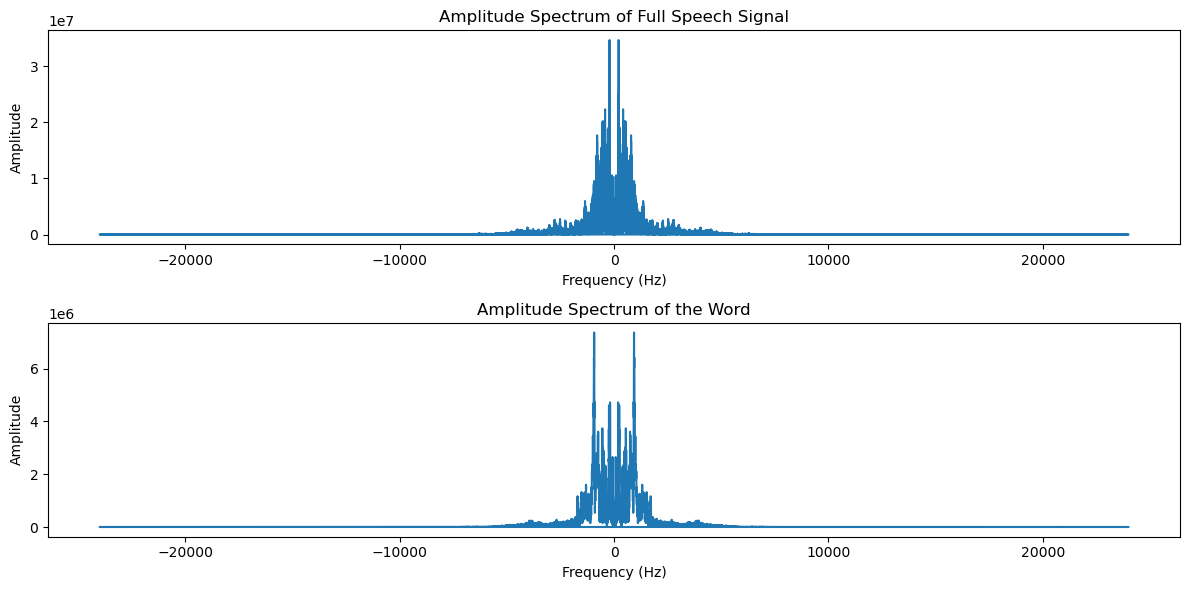

In [9]:
sample_rate, full_signal = wav.read('Bhavya_voice1.wav')

# Define the time range for the analysis (in seconds)
start_time = 1.5  # Start time of the word
end_time = 2.0   # End time of the word

# Extract the portion of the signal corresponding to the word
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)
word_signal = full_signal[start_sample:end_sample]

# Perform FFT on the full signal
full_spectrum = np.fft.fft(full_signal)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(full_spectrum), d=1/sample_rate)

# Take the absolute value of the spectrum to get the amplitude
full_amplitude = np.abs(full_spectrum)

# Perform FFT on the word signal
word_spectrum = np.fft.fft(word_signal)

# Take the absolute value of the spectrum to get the amplitude
word_amplitude = np.abs(word_spectrum)

# Plot the spectra for comparison
plt.figure(figsize=(12, 6))

# Plot the spectrum of the full signal
plt.subplot(2, 1, 1)
plt.plot(frequencies, full_amplitude)
plt.title('Amplitude Spectrum of Full Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Plot the spectrum of the word
plt.subplot(2, 1, 2)
plt.plot(np.fft.fftfreq(len(word_spectrum), d=1/sample_rate), word_amplitude)
plt.title('Amplitude Spectrum of the Word')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### A4.Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components

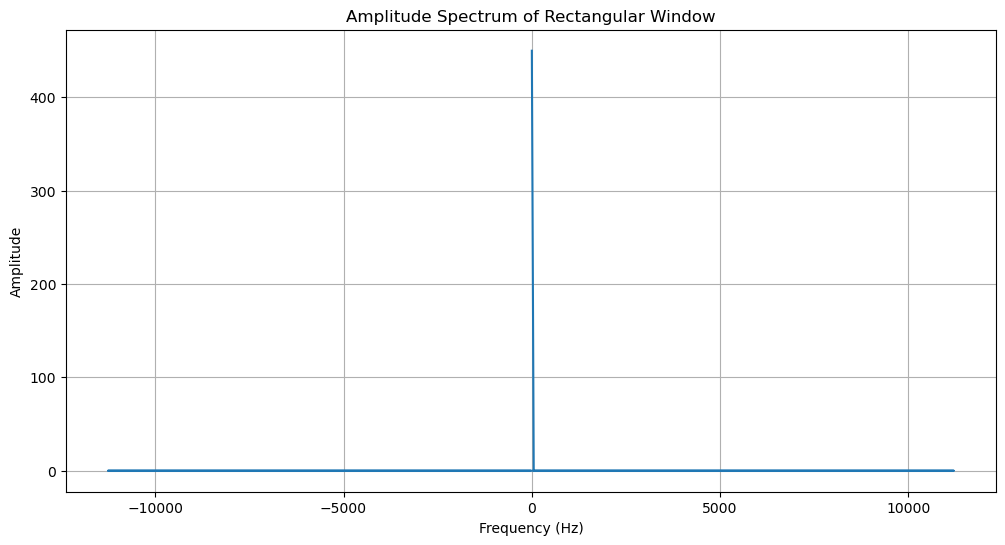

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 22500  # Hz
window_duration = 0.02  # 20 milliseconds

# Generate a rectangular window
t = np.arange(0, window_duration, 1/sampling_rate)
rectangular_window = np.ones_like(t)

# Perform FFT on the rectangular window
spectrum = np.fft.fft(rectangular_window)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(spectrum), d=1/sampling_rate)

# Take the absolute value of the spectrum to get the amplitude
amplitude = np.abs(spectrum)

# Plot the amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude)
plt.title('Amplitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


### A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.

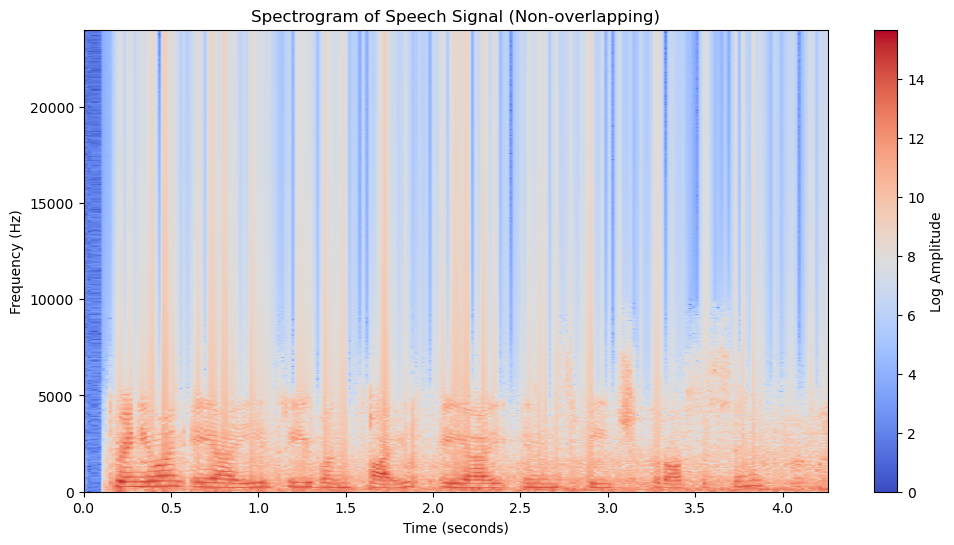

In [18]:
sample_rate, speech_signal = wav.read('Bhavya_voice1.wav')

# Define window parameters
window_size = int(0.02 * sample_rate)  # 20 ms window
# Calculate the number of frames
num_frames = len(speech_signal) // window_size

# Initialize a matrix to store frequency components
frequency_matrix = np.zeros((window_size//2 + 1, num_frames))

# Apply FFT to each non-overlapping window and stack the results
for i in range(num_frames):
    start_idx = i * window_size
    end_idx = start_idx + window_size
    window = speech_signal[start_idx:end_idx]
    spectrum = np.fft.rfft(window)
    frequency_matrix[:, i] = np.abs(spectrum)

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(np.log1p(frequency_matrix), aspect='auto', cmap='coolwarm', origin='lower', extent=[0, len(speech_signal)/sample_rate, 0, sample_rate/2])
plt.title('Spectrogram of Speech Signal (Non-overlapping)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Log Amplitude')
plt.show()

### A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.

In [26]:
import librosa

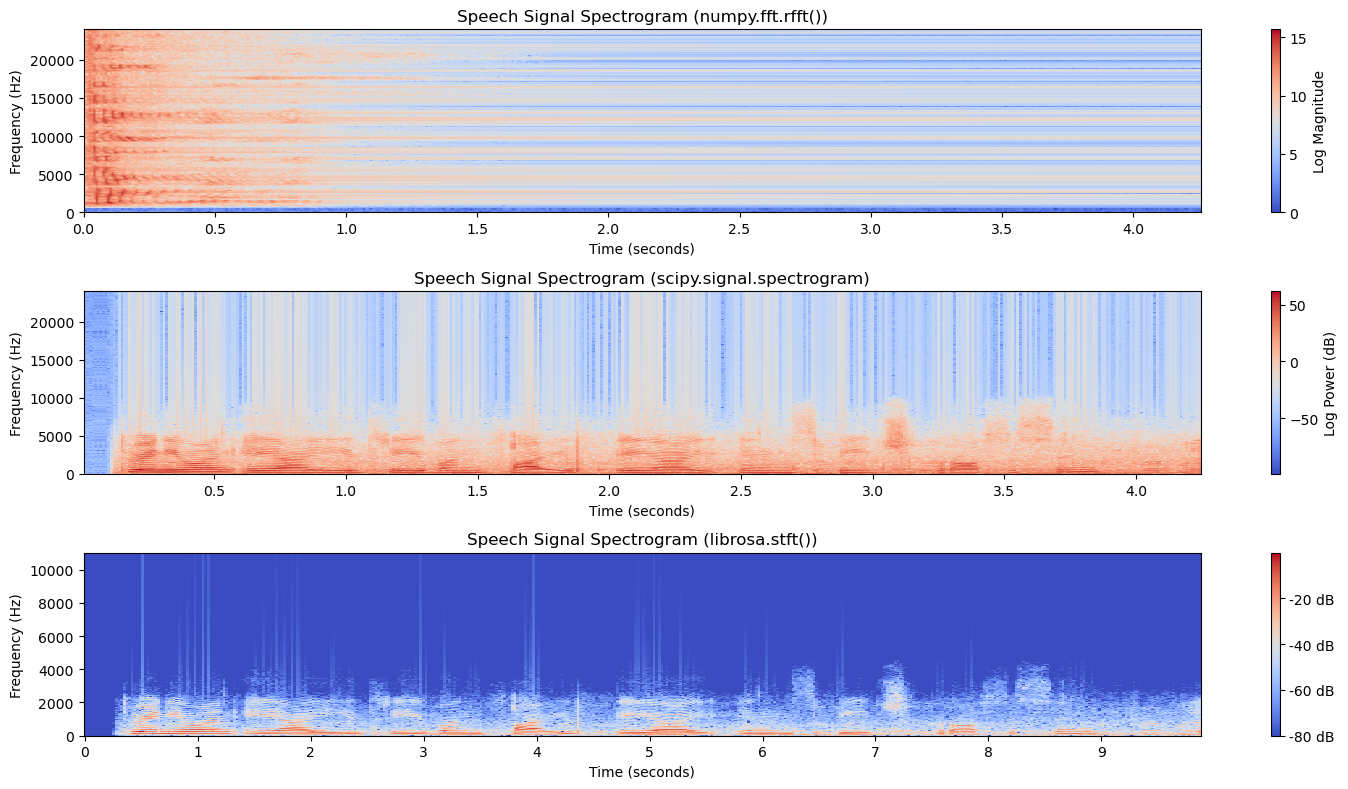

In [29]:
from scipy.signal import spectrogram

sampling_rate, signal = wav.read('Bhavya_voice1.wav')

# Set the window length in seconds (20 milliseconds = 0.02 seconds)
window_length = 0.02

# Convert window length to the number of samples
window_size = int(window_length * sampling_rate)
signal_float = signal.astype(np.float32) / np.iinfo(np.int16).max


# Compute the spectrogram using scipy.signal.spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=sampling_rate, window='hamming', nperseg=window_size, noverlap=window_size//2, nfft=window_size)

# Compute the spectrogram using librosa.stft()
D = librosa.stft(signal_float, n_fft=window_size, hop_length=window_size//2, win_length=window_size, window='hamming')

# Plot the spectrograms
plt.figure(figsize=(15, 8))

# Plot the spectrogram from numpy.fft.rfft()
plt.subplot(3, 1, 1)
plt.imshow(np.log1p(frequency_matrix.T), aspect='auto', cmap='coolwarm', origin='lower', extent=[0, len(signal)/sampling_rate, 0, sampling_rate/2])
plt.colorbar(label='Log Magnitude')
plt.title('Speech Signal Spectrogram (numpy.fft.rfft())')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram from scipy.signal.spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='coolwarm')
plt.colorbar(label='Log Power (dB)')
plt.title('Speech Signal Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram from librosa.stft()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='linear', x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Speech Signal Spectrogram (librosa.stft())')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()